
# Comparação entre K-Means e Gaussian Mixture Model (GMM)

Neste notebook, aplicamos o modelo **Gaussian Mixture Model (GMM)** como alternativa ao K-Means, buscando compreender os agrupamentos latentes nos dados de saúde e trabalho remoto. A análise considera:

- Redução de dimensionalidade com PCA para visualização;
- Escolha do número ideal de clusters (mesmo `k` usado no K-Means);
- Visualização e interpretação dos clusters GMM;
- Comparação qualitativa e quantitativa com os resultados do K-Means.


In [1]:

import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")


In [2]:

# Substitua pelo caminho correto se necessário
df = pd.read_csv("./data/prepared_data.csv")  # você deve adaptar este caminho
df.head()


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score,Salary_Range,Physical_Health_Shoulder_Pain,Physical_Health_Neck_Pain,Physical_Health_Back_Pain,Physical_Health_Eye_Strain,Physical_Health_Wrist_Pain
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,2,$40K-60K,1,0,0,0,0
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,2,$80K-100K,0,0,1,0,0
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,2,$80K-100K,1,0,0,0,0
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,2,$60K-80K,1,0,0,0,0
4,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,3,$60K-80K,0,0,1,0,0


In [11]:

# OneHotEncoder para variáveis categóricas
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded = encoder.fit_transform(df_encoded[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=df_encoded.index)

# Concatenar com colunas numéricas
df_encoded = pd.concat([df_encoded.drop(columns=categorical_cols), encoded_df], axis=1)

# Normalizar todas as variáveis
scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns, index=df_encoded.index)
df_encoded.head()


,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Physical_Health_Shoulder_Pain,Physical_Health_Neck_Pain,Physical_Health_Back_Pain,Physical_Health_Eye_Strain,Physical_Health_Wrist_Pain,Survey_Date_2025-06-01,...,Mental_Health_Status_Stress Disorder,Mental_Health_Status_unknown,Burnout_Level_High,Burnout_Level_Low,Burnout_Level_Medium,Salary_Range_$100K-120K,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,0.116279,0.966667,0.50,0.25,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.348837,0.066667,0.75,0.25,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.232558,0.033333,0.50,0.25,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.418605,0.933333,0.00,0.25,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.697674,0.866667,0.75,0.50,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:

# Selecionar colunas numéricas para clustering
features = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
X = df_encoded[features].copy()

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame para plotagem
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: 

In [6]:

# Número de clusters (ajustar para o mesmo do KMeans)
n_clusters = 4

gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df_pca['GMM_Cluster'] = gmm_labels


/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: 

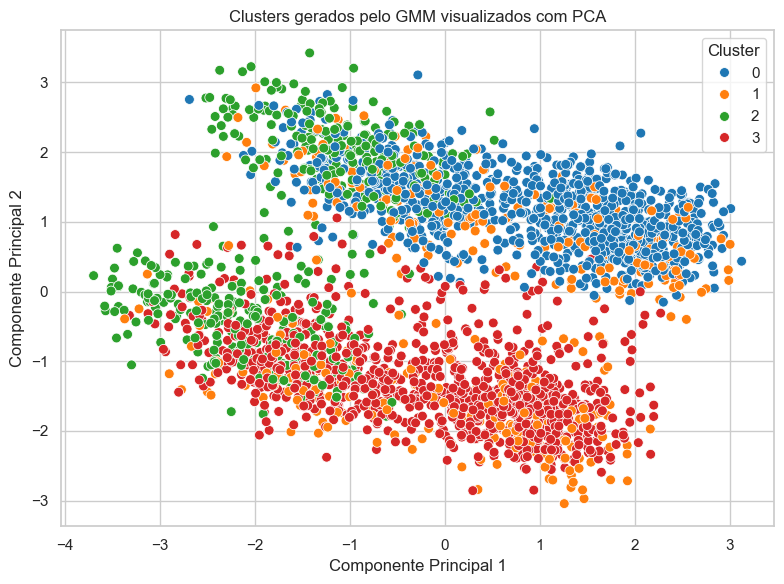

In [7]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='GMM_Cluster', palette='tab10', s=50)
plt.title("Clusters gerados pelo GMM visualizados com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [8]:

# Comparar número de pontos por cluster
pd.Series(gmm_labels).value_counts().sort_index()


0     956
1     415
2     476
3    1030
Name: count, dtype: int64


## Conclusão

O GMM conseguiu identificar agrupamentos probabilísticos com base em distribuições gaussianas. A visualização mostra a separação dos clusters no espaço PCA, permitindo comparação direta com os grupos definidos pelo K-Means.

Você pode agora comparar os perfis médios de cada grupo com base nos rótulos `GMM_Cluster`, como foi feito com `kmeans_cluster` no notebook original.


In [9]:
grupo_bem_estar = [
    'Age', 'Hours_Per_Week', 'Work_Life_Balance_Score', 'Social_Isolation_Score',
    'Physical_Health_Shoulder_Pain', 'Physical_Health_Neck_Pain',
    'Physical_Health_Back_Pain', 'Physical_Health_Eye_Strain', 'Physical_Health_Wrist_Pain'
]

grupo_demografia = [
    'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Gender_Prefer not to say',
    'Region_Africa', 'Region_Asia', 'Region_Europe', 'Region_North America',
    'Region_Oceania', 'Region_South America'
]

grupo_industria = [
    'Industry_Customer Service', 'Industry_Education', 'Industry_Finance',
    'Industry_Healthcare', 'Industry_Manufacturing', 'Industry_Marketing',
    'Industry_Professional Services', 'Industry_Retail', 'Industry_Technology'
]

grupo_funcoes = [
    'Job_Role_Account Manager', 'Job_Role_Business Analyst', 'Job_Role_Consultant',
    'Job_Role_Content Writer', 'Job_Role_Customer Service Manager',
    'Job_Role_Data Analyst', 'Job_Role_Data Scientist', 'Job_Role_DevOps Engineer',
    'Job_Role_Digital Marketing Specialist', 'Job_Role_Executive Assistant',
    'Job_Role_Financial Analyst', 'Job_Role_HR Manager', 'Job_Role_IT Support',
    'Job_Role_Marketing Specialist', 'Job_Role_Operations Manager',
    'Job_Role_Product Manager', 'Job_Role_Project Manager', 'Job_Role_Quality Assurance',
    'Job_Role_Research Scientist', 'Job_Role_Sales Representative',
    'Job_Role_Social Media Manager', 'Job_Role_Software Engineer',
    'Job_Role_Technical Writer', 'Job_Role_UX Designer'
]

grupo_arranjo = [
    'Work_Arrangement_Hybrid', 'Work_Arrangement_Onsite', 'Work_Arrangement_Remote'
]

grupo_saude_mental = [
    'Mental_Health_Status_ADHD', 'Mental_Health_Status_Anxiety',
    'Mental_Health_Status_Burnout', 'Mental_Health_Status_Depression',
    'Mental_Health_Status_PTSD', 'Mental_Health_Status_Stress Disorder',
    'Mental_Health_Status_unknown', 'Burnout_Level_High',
    'Burnout_Level_Low', 'Burnout_Level_Medium'
]

grupo_salario = [
    'Salary_Range_$40K-60K', 'Salary_Range_$60K-80K',
    'Salary_Range_$80K-100K', 'Salary_Range_$100K-120K', 'Salary_Range_$120K+'
]



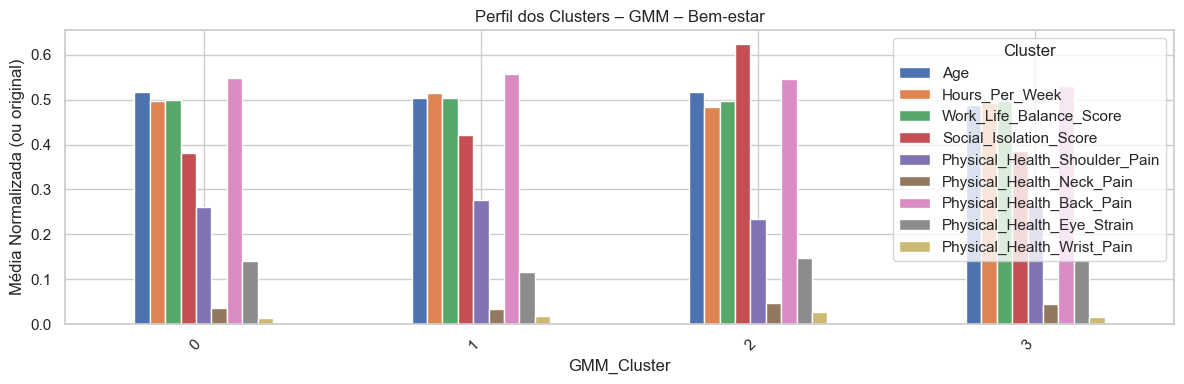

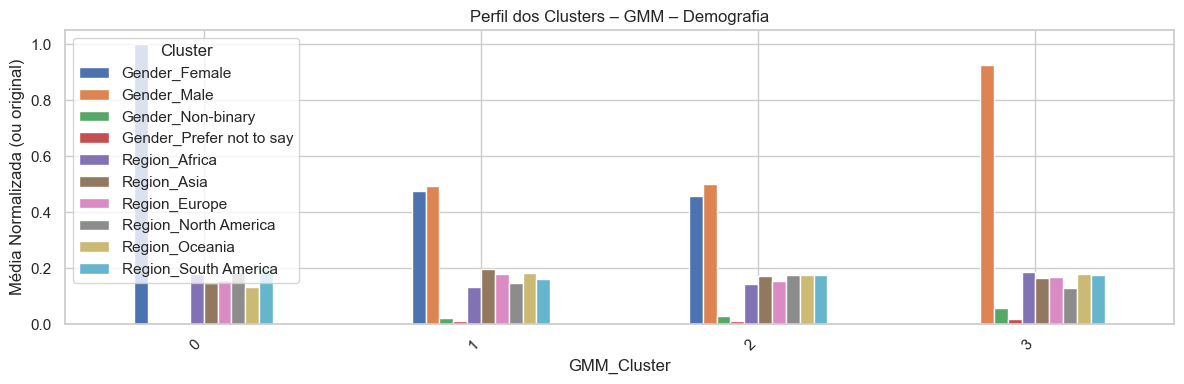

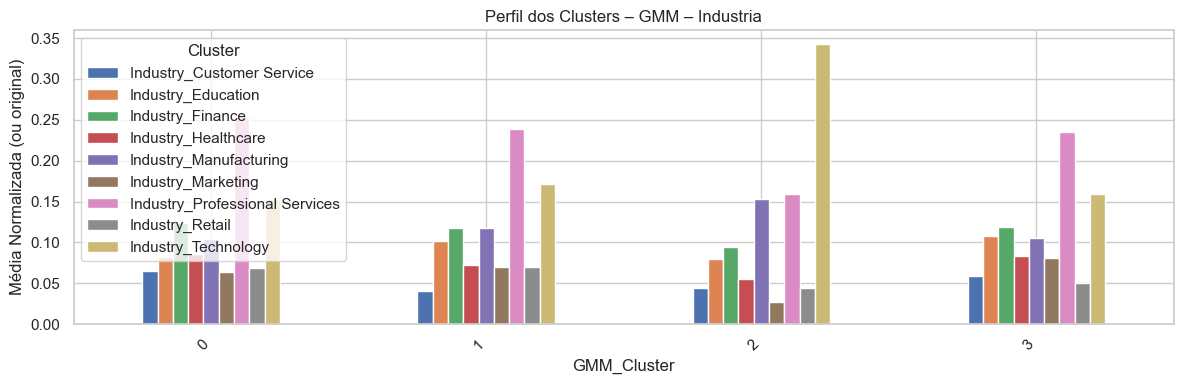

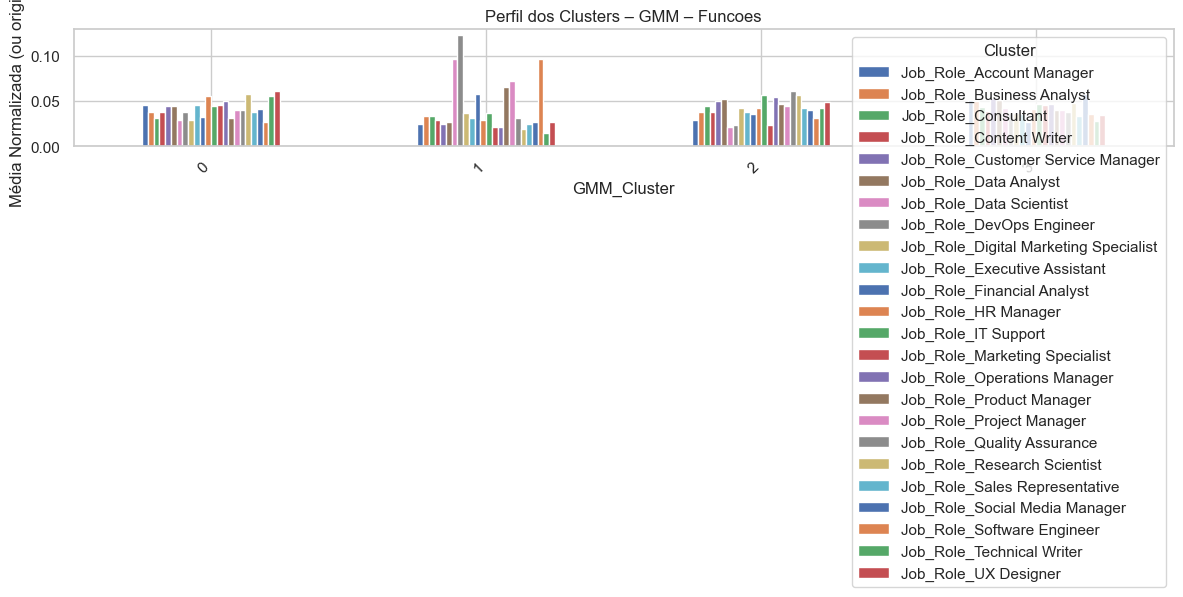

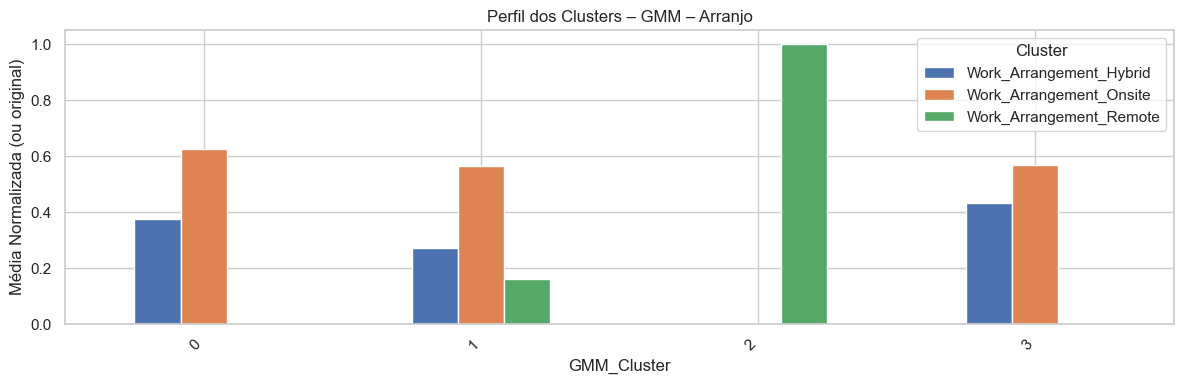

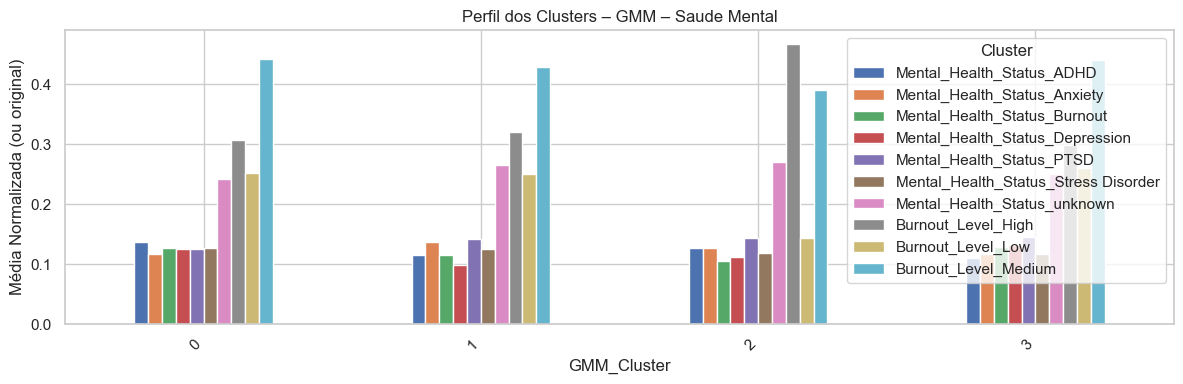

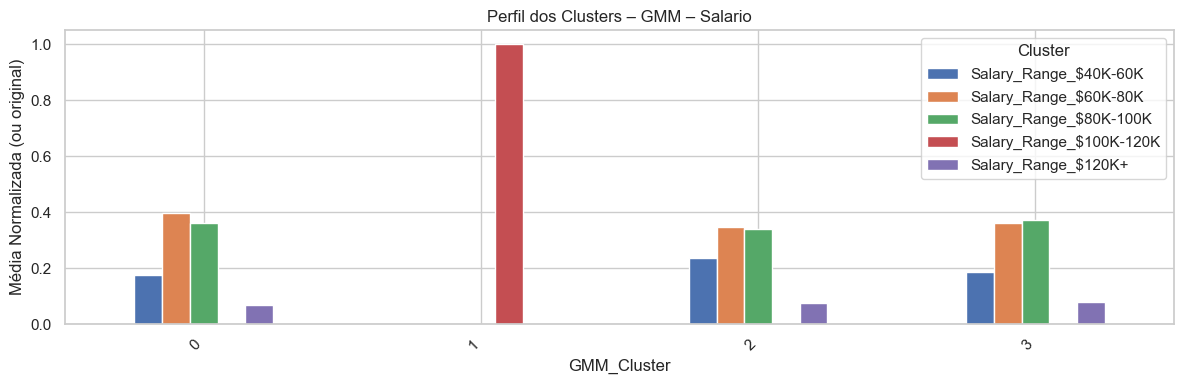

In [13]:
# Agrupar por cluster GMM e calcular médias apenas das colunas numéricas
gmm_grouped = df_encoded.copy()
gmm_grouped['GMM_Cluster'] = gmm_labels
num_cols = gmm_grouped.select_dtypes(include='number').columns
grupos = gmm_grouped.groupby('GMM_Cluster')[num_cols].mean()

# Exemplo de grupos temáticos (ajuste conforme suas listas de colunas)
grupos_tematicos = {
    'Bem-estar': [col for col in grupo_bem_estar if col in num_cols],
    'Demografia': [col for col in grupo_demografia if col in num_cols],
    'Industria': [col for col in grupo_industria if col in num_cols],
    'Funcoes': [col for col in grupo_funcoes if col in num_cols],
    'Arranjo': [col for col in grupo_arranjo if col in num_cols],
    'Saude Mental': [col for col in grupo_saude_mental if col in num_cols],
    'Salario': [col for col in grupo_salario if col in num_cols]
}

for nome, colunas in grupos_tematicos.items():
    if colunas:
        plt.figure(figsize=(12, 4))
        grupos[colunas].plot.bar(ax=plt.gca())
        plt.title(f'Perfil dos Clusters – GMM – {nome}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Média Normalizada (ou original)')
        plt.tight_layout()
        plt.legend(title='Cluster')
        plt.show()